In [24]:
#Extracting the dataset and categorizing my target feature
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
data=pd.read_csv('biomechanical_features_orthopedic.csv')
#where abnormal =0 and normal=1
Y=data['class'].replace(['Abnormal', 'Normal'],[0, 1], inplace=True)
X=(data['pelvic_incidence'],data['pelvic_tilt numeric'],data['lumbar_lordosis_angle'],data['sacral_slope'], data['pelvic_radius'], data['degree_spondylolisthesis'])
X=np.array(X)
Y=pd.DataFrame(data['class'])
X=X.T


210 100


<Axes: title={'center': 'Count (target)'}, xlabel='class'>

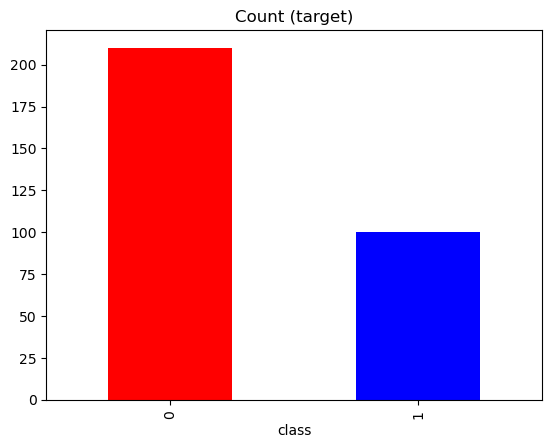

In [25]:
#Balancing of Data
# Class count
count_class_0, count_class_1 = data['class'].value_counts()
print(count_class_0,count_class_1)
# Divide by class
data_class_0 = data[data['class'] == 0] # data forclass abnormal
data_class_1 = data[data['class'] == 1] #data for normal

data['class'].value_counts().plot(kind='bar', title='Count (target)',color=['r','b'])
# bar chart of normal and abnormal before balancing

class
0    210
1    210
Name: count, dtype: int64


<Axes: title={'center': 'Count (target)'}, xlabel='class'>

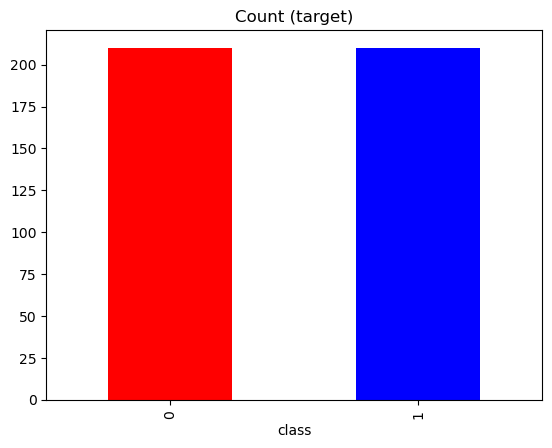

In [30]:
#carrying out balancing of my data set
#smote data Set
su = SMOTE()
X_su, y_su = su.fit_resample(X, Y)
print(y_su["class"].value_counts())
y_su.groupby('class').size().plot(kind='bar',
                                       y = "Count (target)")
X_smote= pd.DataFrame(X_su,columns=['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle',
                               'sacral_slope','pelvic_radius','degree_spondylolisthesis'])
data_smote = pd.concat([X_smote, y_su], axis=1)
data_smote['class'].value_counts().plot(kind='bar', title='Count (target)', color=['r','b'])
# bar chart of normal and abnormal before balancing

In [28]:
pip install --upgrade imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [36]:
#Making use of smote set
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
data=pd.read_csv('smote_data.csv')
#where abnormal =0 and normal=1
y=data['class'].replace(['Abnormal', 'Normal'],[0, 1], inplace=True)
X=(data['pelvic_incidence'],data['pelvic_tilt numeric'],data['lumbar_lordosis_angle'],data['sacral_slope'], data['pelvic_radius'], data['degree_spondylolisthesis'])
X=np.array(X)
y=pd.DataFrame(data['class'])
#transposing my X
X=X.T


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[1.0, 0.9746031746031746, 0.9206349206349206, 0.9428571428571428, 0.8857142857142857, 0.9111111111111111, 0.8761904761904762, 0.8857142857142857, 0.8698412698412699]------range(1, 10)

[0.8285714285714286, 0.819047619047619, 0.8857142857142857, 0.9047619047619048, 0.8666666666666667, 0.8666666666666667, 0.8476190476190476, 0.8571428571428571, 0.8666666666666667]------range(1, 10)


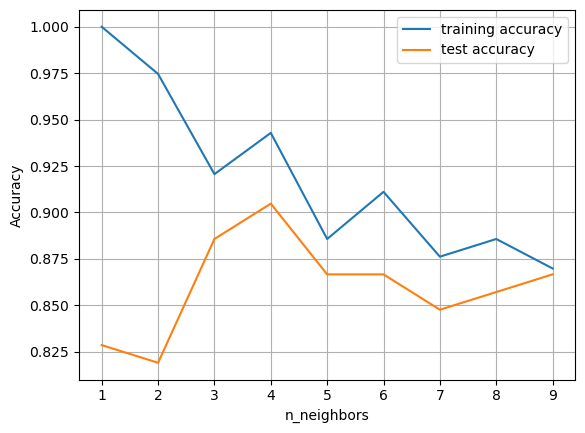

In [34]:
#splitting my dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#Finding nearest neighbour
training_accuracy = []
test_accuracy = []
#Selection of the nearest neighbour
# try n_neighbors from 1 to 10
neighbors_settings = range(1,10)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
# record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
# record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
#Plotting train and test set to get the best nearest neighbor
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
print(f'{training_accuracy}------{neighbors_settings}')
print()
print(f'{test_accuracy}------{neighbors_settings}')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.grid()
plt.legend()

In [18]:
#fitting our knn algorithm
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
#finding predicted output
knn.score(X_test,y_test)
y_pred = clf.predict(X_test)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix:
[[42 12]
 [ 2 49]]
Accuracy for knn: 0.8667
              precision    recall  f1-score   support

           0       0.95      0.78      0.86        54
           1       0.80      0.96      0.88        51

    accuracy                           0.87       105
   macro avg       0.88      0.87      0.87       105
weighted avg       0.88      0.87      0.87       105



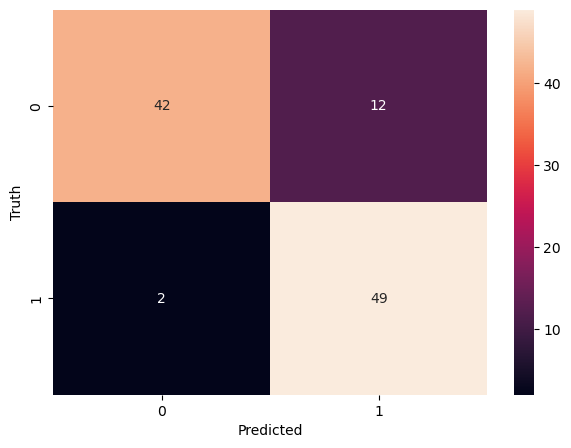

In [19]:
# finding confusion matrix, accuracy,classification report
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sn
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
plt.figure (figsize=(7,5))
sn.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy for knn: {accuracy:.4f}")
print(classification_report(y_test,y_pred))


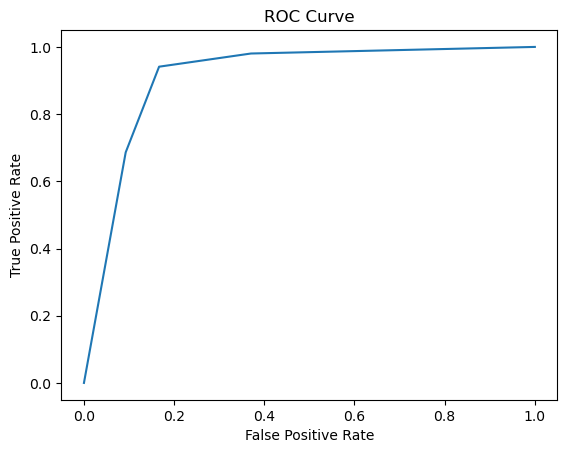

AUC 0.9112200435729847


In [20]:
#Visualisation of ROC curve and AUC
from sklearn import metrics
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc=metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()
print('AUC',auc)

In [21]:
# creating validation data set to provides an unbiased evaluation of the model’s performance 
X_tr,X_val,y_tr,y_val=train_test_split(X,y,test_size=0.1,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_tr)
knn.fit(X_tr,y_tr)
valid_pred=knn.predict(X_val)
valid_pred_prob=knn.predict_proba(X_val)[:,1]
valid_acc_score= accuracy_score(y_val,valid_pred)
valid_auc_score=metrics.roc_auc_score(y_val,valid_pred_prob)
print(f'Our accuracy on the validation is {valid_acc_score:0.4f} and AUC is {valid_auc_score:0.4f} ')

Our accuracy on the validation is 0.8571 and AUC is 0.9468 


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Decision Tree

[0.8603174603174604, 0.8952380952380953, 0.9238095238095239, 0.9492063492063492, 0.9619047619047619, 0.9746031746031746, 0.9841269841269841, 0.9936507936507937]
[0.8095238095238095, 0.819047619047619, 0.8380952380952381, 0.8, 0.7904761904761904, 0.8095238095238095, 0.819047619047619, 0.8571428571428571]
[2, 3, 4, 5, 6, 7, 8, 9]


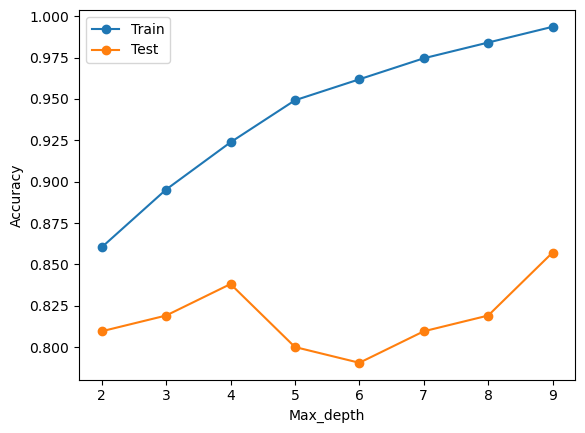

In [35]:
#importing of various library
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dt
import sklearn.model_selection as ms
import sklearn.tree as tr
#selection of the depth for decision tree
trACC=[]
tesACC=[]
MD=[]

for i in range(2,10):
    #Create a Decision Tree classifier with the current max_depth
    DT=tr.DecisionTreeClassifier(max_depth=i)
    DT.fit(X_train,y_train)
    trACC.append(DT.score(X_train,y_train))
    tesACC.append(DT.score(X_test,y_test))
    MD.append(i)
print(trACC)
print(tesACC)
print(MD)
plt.figure()
plt.plot(MD, trACC, label='Train',marker='o')
plt.plot(MD, tesACC, label='Test', marker='o')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

0.8952380952380953
0.819047619047619
|--- feature_5 <= -0.02
|   |--- feature_3 <= -1.04
|   |   |--- feature_4 <= 0.31
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.31
|   |   |   |--- class: 1
|   |--- feature_3 >  -1.04
|   |   |--- feature_5 <= -0.40
|   |   |   |--- class: 1
|   |   |--- feature_5 >  -0.40
|   |   |   |--- class: 1
|--- feature_5 >  -0.02
|   |--- feature_5 <= 0.16
|   |   |--- feature_5 <= 0.14
|   |   |   |--- class: 0
|   |   |--- feature_5 >  0.14
|   |   |   |--- class: 1
|   |--- feature_5 >  0.16
|   |   |--- feature_0 <= -0.15
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.15
|   |   |   |--- class: 0



[Text(0.5, 0.875, 'x[5] <= -0.017\ngini = 0.5\nsamples = 315\nvalue = [156, 159]'),
 Text(0.25, 0.625, 'x[3] <= -1.036\ngini = 0.352\nsamples = 202\nvalue = [46, 156]'),
 Text(0.125, 0.375, 'x[4] <= 0.311\ngini = 0.491\nsamples = 37\nvalue = [21, 16]'),
 Text(0.0625, 0.125, 'gini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(0.1875, 0.125, 'gini = 0.388\nsamples = 19\nvalue = [5, 14]'),
 Text(0.375, 0.375, 'x[5] <= -0.402\ngini = 0.257\nsamples = 165\nvalue = [25, 140]'),
 Text(0.3125, 0.125, 'gini = 0.183\nsamples = 137\nvalue = [14, 123]'),
 Text(0.4375, 0.125, 'gini = 0.477\nsamples = 28\nvalue = [11, 17]'),
 Text(0.75, 0.625, 'x[5] <= 0.161\ngini = 0.052\nsamples = 113\nvalue = [110, 3]'),
 Text(0.625, 0.375, 'x[5] <= 0.142\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.375, 'x[0] <= -0.151\ngini = 0.02\nsamples = 101\nvalue = [100, 1

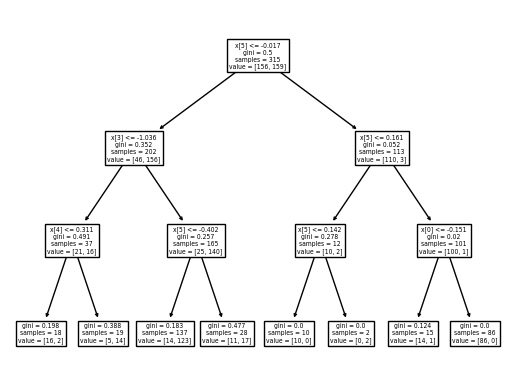

In [38]:
# Decision tree using depth of 3
from sklearn import tree
DT=tr.DecisionTreeClassifier(max_depth=3)
DT.fit(X_train,y_train)
trACC=DT.score(X_train,y_train)
tesACC=DT.score(X_test,y_test)

print(trACC)
print(tesACC)
model = DT.fit(X_train, y_train)
text_representation = tr.export_text(DT)
print(text_representation)

# To Visualize Decision Tree
tree.plot_tree(model)

Confusion Matrix:
[[38 16]
 [ 3 48]]
              precision    recall  f1-score   support

           0       0.93      0.70      0.80        54
           1       0.75      0.94      0.83        51

    accuracy                           0.82       105
   macro avg       0.84      0.82      0.82       105
weighted avg       0.84      0.82      0.82       105



Text(58.222222222222214, 0.5, 'Truth')

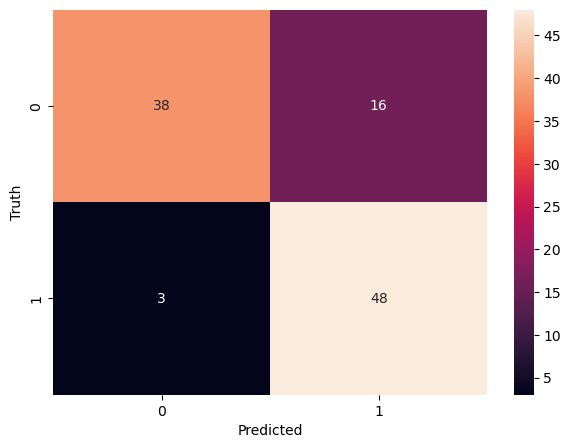

In [39]:
#Finding confusion Matrix,accuracy and classification report
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred_dec = DT.predict(X_test)
conf_matrix_dec = confusion_matrix(y_test, y_pred_dec)
print("Confusion Matrix:")
print(conf_matrix_dec)
print(classification_report(y_test,y_pred_dec))
plt.figure (figsize=(7,5))
sn.heatmap(conf_matrix_dec, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

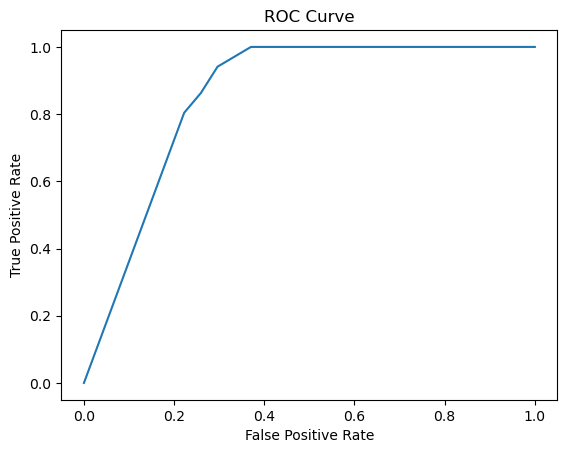

Auc for decision tree 0.855119825708061


In [40]:
#Visualisation of ROC curve and AUC
from sklearn import metrics
y_pred_proba_dec = DT.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_dec)
auc_dec=metrics.roc_auc_score(y_test, y_pred_proba_dec)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Auc for decision tree',auc_dec)

In [41]:
# creating validation data set to provides an unbiased evaluation of the model’s performance 
X_tr_dec,X_val_dec,y_tr_dec,y_val_dec=train_test_split(X,y,test_size=0.1,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_dec = scaler.fit_transform(X_tr_dec)
DT.fit(X_tr_dec,y_tr_dec)
valid_pred_dec=DT.predict(X_val_dec)
valid_pred_prob_dec=DT.predict_proba(X_val_dec)[:,1]
valid_acc_score_dec= accuracy_score(y_val_dec,valid_pred_dec)
valid_auc_score_dec=metrics.roc_auc_score(y_val_dec,valid_pred_prob_dec)
print(f'Our accuracy on the validation is {valid_acc_score_dec:0.4f} and AUC is {valid_auc_score_dec:0.4f} ')

Our accuracy on the validation is 0.8095 and AUC is 0.9653 


# LOGISTIC REGRESSION


In [44]:
# Finding train and test accuracy
import sklearn.linear_model as lm
#LR=lm.LogisticRegression()
LR=lm.LogisticRegression()
LR.fit(X_train,y_train)
ACC_train=LR.score(X_train,y_train)
ACC_test=LR.score(X_test,y_test)
print('Train Accuracy',ACC_train)
print('Test Accuracy', ACC_test)

Train Accuracy 0.8698412698412699
Test Accuracy 0.819047619047619


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for logistic regression: 0.8190
Confusion Matrix:
[[41 13]
 [ 6 45]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        54
           1       0.78      0.88      0.83        51

    accuracy                           0.82       105
   macro avg       0.82      0.82      0.82       105
weighted avg       0.83      0.82      0.82       105



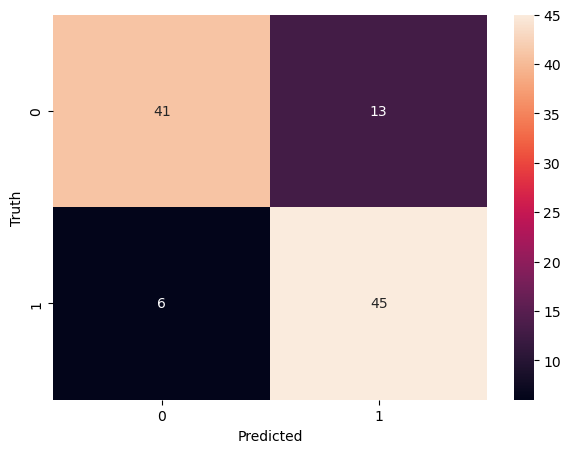

In [45]:
%matplotlib inline
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sn
y_pred_log = LR.predict(X_test)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
accuracy_log = accuracy_score(y_test, y_pred_log)
plt.figure (figsize=(7,5))
sn.heatmap(conf_matrix_log, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(f"Accuracy for logistic regression: {accuracy_log:.4f}")
print("Confusion Matrix:")
print(conf_matrix_log)
print(classification_report(y_test,y_pred_log))

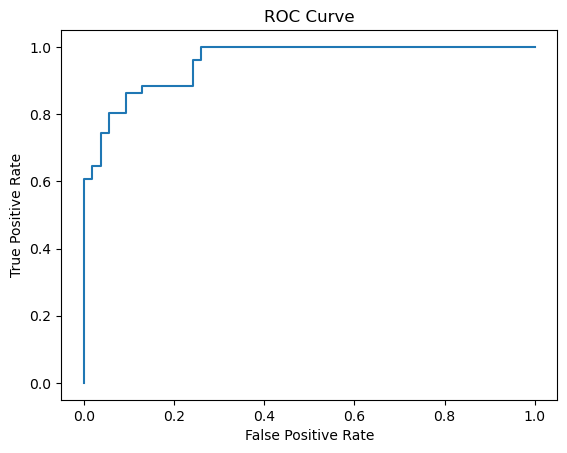

Auc of logistic regression 0.9553376906318083


In [49]:
#Visualization for ROC Curve, AUC
from sklearn import metrics
y_pred_proba_log = LR.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_log)
auc_log=metrics.roc_auc_score(y_test, y_pred_proba_log)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Auc of logistic regression', auc_log)

In [46]:
# creating validation data set to provides an unbiased evaluation of the model’s performance 
from sklearn.preprocessing import StandardScaler
X_tr_log,X_val_log,y_tr_log,y_val_log=train_test_split(X,y,test_size=0.1,random_state=42)
scaler = StandardScaler()
X_train_log = scaler.fit_transform(X_tr_dec)
LR.fit(X_tr_log,y_tr_log)
valid_pred_log=DT.predict(X_val_log)
valid_pred_prob_log=LR.predict_proba(X_val_log)[:,1]
valid_acc_score_log= accuracy_score(y_val_log,valid_pred_log)
valid_auc_score_log=metrics.roc_auc_score(y_val_log,valid_pred_prob_log)
print(f'Our accuracy on the validation using logistic regression {valid_acc_score_log:0.4f} and AUC is {valid_auc_score_log:0.4f} ')

Our accuracy on the validation using logistic regression 0.8095 and AUC is 0.9861 


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
#https://www.nickmccullum.com
#/python-machine-learning/support-vector-machines-python/
# Finding train and test accuracy
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,y_train)
ACC_train_svc=svc.score(X_train,y_train)
ACC_test_svc=svc.score(X_test,y_test)
print('Train Accuracy',ACC_train_svc)
print('Test Accuracy', ACC_test_svc)


Train Accuracy 0.8888888888888888
Test Accuracy 0.8571428571428571


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy using svm : 0.8571
Confusion Matrix:
[[42 12]
 [ 3 48]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        54
           1       0.80      0.94      0.86        51

    accuracy                           0.86       105
   macro avg       0.87      0.86      0.86       105
weighted avg       0.87      0.86      0.86       105



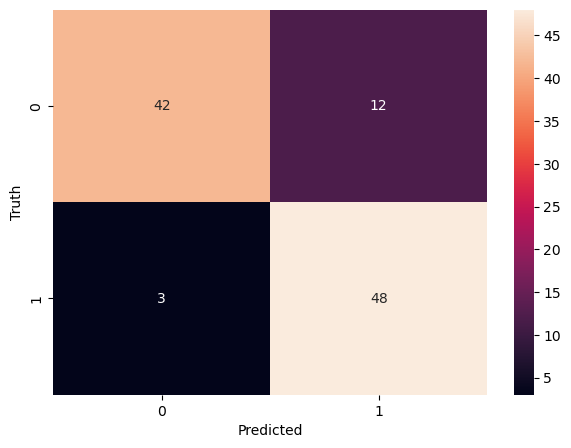

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred_svc=svc.predict(X_test)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
plt.figure (figsize=(7,5))
sn.heatmap(conf_matrix_svc, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(f"Accuracy using svm : {accuracy_svc:.4f}")
print("Confusion Matrix:")
print(conf_matrix_svc)
print(classification_report(y_test,y_pred_svc))


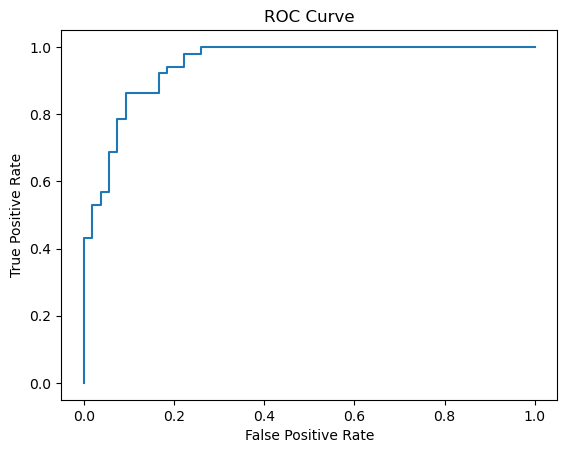

auc using SVM 0.9484386347131444


In [50]:
#Visualizing ROC Curve and AUC
from sklearn import metrics
y_pred_proba_svc = svc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_svc)
auc_svc=metrics.roc_auc_score(y_test, y_pred_proba_svc)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()
print('auc using SVM', auc_svc)


In [51]:
#creating validation data set to provides an unbiased evaluation of the model’s performance 
X_tr_svc,X_val_svc,y_tr_svc,y_val_svc=train_test_split(X,y,test_size=0.1,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_svc = scaler.fit_transform(X_tr_svc)
svc.fit(X_tr_svc,y_tr_svc)
valid_pred_svc=svc.predict(X_val_svc)
valid_pred_prob_svc=svc.predict_proba(X_val_svc)[:,1]
valid_acc_score_svc= accuracy_score(y_val_svc,valid_pred_svc)
valid_auc_score_svc=metrics.roc_auc_score(y_val_svc,valid_pred_prob_svc)
print(f'Our accuracy on the validation using SVM is {valid_acc_score_svc:0.4f} and AUC is {valid_auc_score_svc:0.4f} ')

Our accuracy on the validation using SVM is 0.9524 and AUC is 0.9838 


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['KNN', 'DT', 'LR', 'SVM']
[0.8571428571428571, 0.8095238095238095, 0.8095238095238095, 0.9523809523809523]


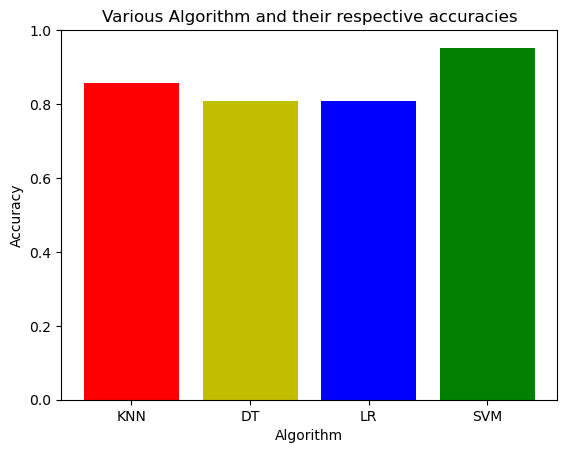

In [95]:
#Visualization of the various algorithm and their respective accuracy
import matplotlib.pyplot as plt
valid_accuracy={'KNN':valid_acc_score,'DT':valid_acc_score_dec,'LR':valid_acc_score_log,'SVM':valid_acc_score_svc}
algorithm=[]
accuracy=[]
for x,y in valid_accuracy.items():
    algorithm.append(x)
    accuracy.append(y)
print(algorithm)
print(accuracy)
plt.figure()
plt.bar(algorithm,accuracy,color=['r','y','b','g'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Various Algorithm and their respective accuracies')
plt.show()